# Dealing with Imbalanced Data
we will go through some of the basic techinques for dealing with imbalanced datasets. 

We will cover:
- Random Oversampling
- Random Undersampling 
- Synthetic Minority Oversampling (SMOTE)
- Borderline SMOTE
- Adaptive Synthetic Oversampling 

imblearn Documentation: https://imbalanced-learn.org/stable/

### On the Data 
This dataset is a good representation of what you may see in the real world. Most data will have some imbalances, and in certain domains you will see a lot of inequality. You will likely see large imbalances in cases of expensive purchases or fraud detection.

In [10]:
# libraries

import pandas as pd

df = pd.read_csv('../data/Aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [12]:
df.shape

(19158, 14)

In [13]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
df.target.value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

In [17]:
#create validation dataset to see how different sampling methocds could impact model outcomes
# For x, drop enrolled_id and target and create dummy

X = pd.get_dummies(df.drop(['enrollee_id', 'target'], axis=1))
y = df['target']

In [18]:
X.head()

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0.776,47,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.624,83,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.789,52,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.767,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
X.shape

(19158, 186)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

<Axes: xlabel='Target', ylabel='Frequency'>

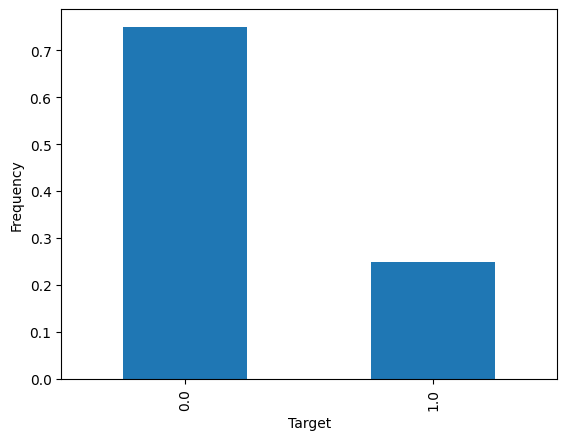

In [25]:
# see imblance in data majority is not looking for a job change (0)
y_train.value_counts(normalize=True).plot(kind = 'bar', xlabel = "Target", ylabel="Frequency")

In [26]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

## Parameters 

### For all sampling models

sampling_strategy: float, str, dict or callable, default=’auto’

>- float
    - When float, it corresponds to the desired ratio of the number of samples in the minority class over 
    the number of samples in the majority class after resampling. Therefore, the ratio is expressed as 
    \alpha_{os} = N_{rm} / N_{M} where N_{rm} is the number of samples in the minority class after 
    resampling and N_{M} is the number of samples in the majority class.
>- str
>    - 'minority': resample only the minority class;
>
>    - 'not minority': resample all classes but the minority class;
>
>    - 'not majority': resample all classes but the majority class;
>
>    - 'all': resample all classes;
>
>    - 'auto': equivalent to 'not majority'. 
>- dict
    - When dict, the keys correspond to the targeted classes. The values correspond to the desired number
    of samples for each targeted class.

random_state: int, RandomState instance, default=None 
- int --> Most cases use this to set a consistent random state

shrinkage: float or dict, default=None
- Shrinkage allows us to add slight noise to our data so that our resampled variables don't perfectly overlap. This could be useful for normalization of our results. A good example of how this works is located here: https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_shrinkage_effect.html
>- if **None**, a normal bootstrap will be generated without perturbation. It is equivalent to shrinkage=0 as well
>- if a **float** is given, the shrinkage factor will be used for all classes to generate the smoothed bootstrap;
>- if a **dict** is given, the shrinkage factor will specific for each class. The key correspond to the targeted class and the value is the shrinkage factor.

### For Smote and Borderline Smote
k_neighbor: sint or object, default=5
>- If int, number of nearest neighbours to used to construct synthetic samples. If object, an estimator that inherits from KNeighborsMixin that will be used to find the k_neighbors.

n_jobs: int, default=None
>- Number of CPU cores used during the cross-validation loop. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

### For Borderline Smote
kind: {“borderline-1”, “borderline-2”}, default=’borderline-1’
>- The type of SMOTE algorithm to use one of the following options: 'borderline-1', 'borderline-2'.
>    -Breakdown of difference between borderline-1 and borderline-2: https://sci2s.ugr.es/keel/pdf/specific/congreso/han_borderline_smote.pdf

Copied from Docs: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
Smote: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
Borderline Smote: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html

# Random Oversampling
Random Oversampling is simply randomly picking data points in our minority class and duplicating them. 

In [28]:
from imblearn.over_sampling import RandomOverSampler

o_sample = RandomOverSampler(random_state=42)

x_o_samp, y_o_samp = o_sample.fit_resample(X_train, y_train)

In [38]:
y_o_samp.value_counts()

target
1.0    11501
0.0    11501
Name: count, dtype: int64

<Axes: xlabel='target'>

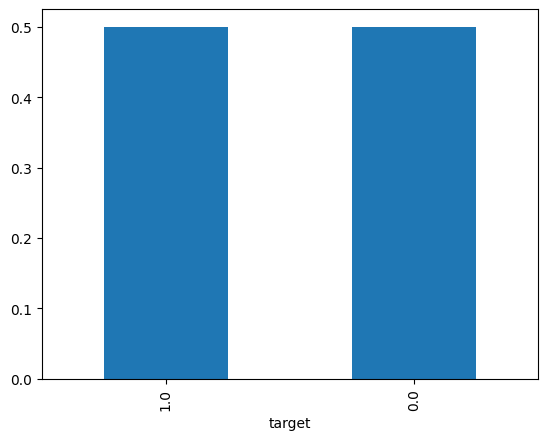

In [34]:
y_o_samp.value_counts(normalize=True).plot(kind="bar")

# Random Undersampling
Random Undersampling is simply randomly picking data points in our majority class and removing them. 

In [35]:
from imblearn.under_sampling import RandomUnderSampler

u_sam = RandomUnderSampler(random_state=42)

x_u_samp, y_u_samp = u_sam.fit_resample(X_train, y_train)

In [39]:
#note how many less total rows we have now 
y_u_samp.value_counts()

target
0.0    3825
1.0    3825
Name: count, dtype: int64

<Axes: xlabel='target'>

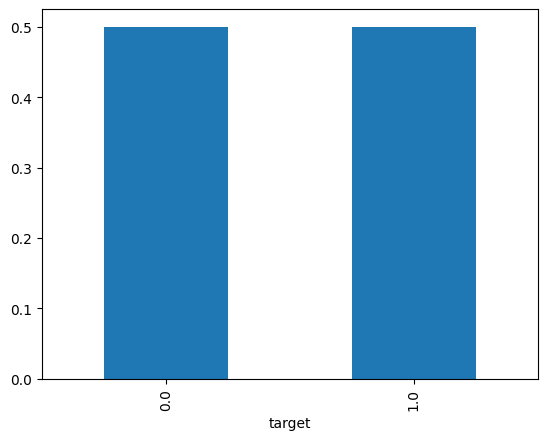

In [40]:
y_u_samp.value_counts(normalize=True).plot(kind="bar")

# Synthetic Minority Oversampling (SMOTE)
Synthetic Minority Oversampling (SMOTE) is an oversampling technique that creates synthetic data points. SMOTE address’ the core problem in oversampling. Oversampling creates duplicate datapoints whereas SMOTE slightly alters these data points. 

In [41]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 42) 

X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [42]:
y_smote.value_counts()

target
1.0    11501
0.0    11501
Name: count, dtype: int64

<Axes: xlabel='target'>

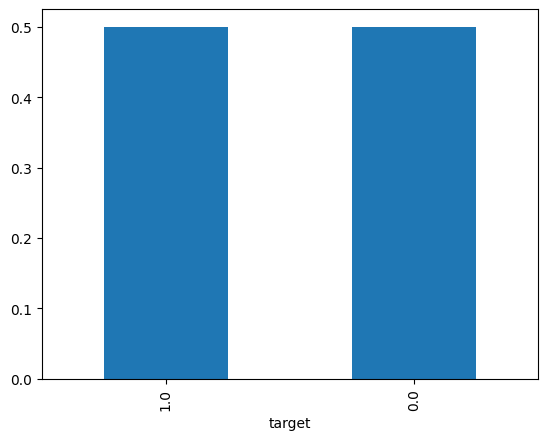

In [43]:
y_smote.value_counts(normalize=True).plot.bar()

# Borderline Smote
The idea behind borderline SMOTE is that we only want to use data that’s at risk of being misclassified as the data to be oversampled. In this case, we build a classifier to classify points as positive or negative. Then, for the data points we misclassify, we oversample those data points. This would hopefully train our algorithm to better recognize these difficult instances and correct for them. 

In [44]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state = 42) 

X_bsmote, y_bsmote = bsmote.fit_resample(X_train,y_train)

In [45]:
y_bsmote.value_counts()

target
1.0    11501
0.0    11501
Name: count, dtype: int64

<Axes: xlabel='target'>

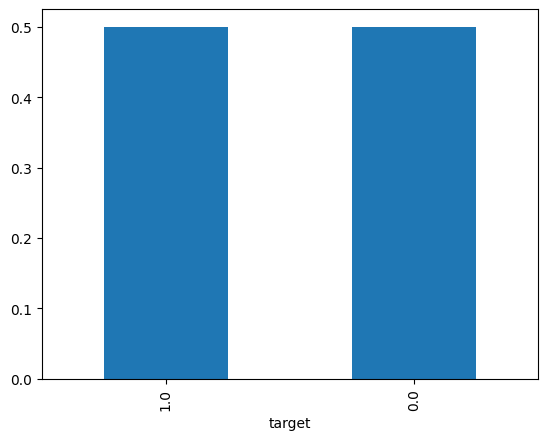

In [49]:
y_bsmote.value_counts(normalize=True).plot.bar()

# Adaptive Synthetic Oversampling (ADASYN)
The idea behind AdaSyn is to use a weight distribution of our minority class. Essentially, we give higher weight to instances that are more difficult to learn and lower weight to instances that are easier to learn. AdaSyn is very similar to safe-level SMOTE, except there’s just a different way of computing the synthetic data points. 

In [50]:
from imblearn.over_sampling import ADASYN 
adasyn = ADASYN(random_state = 42) 

X_ada, y_ada = adasyn.fit_resample(X_train,y_train)

<Axes: xlabel='target'>

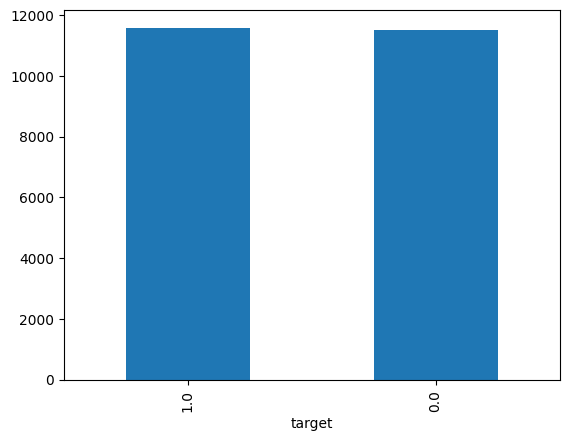

In [51]:
y_ada.value_counts().plot.bar()

In [52]:
#let's explore a few variables across these 4 different oversampling techniques across two variables 'city_development_index' and 'training_hours'
print('city_development_index Differences:')

for i in [x_o_samp, X_smote, X_bsmote, X_ada]:
    print(i.mean()['city_development_index'])

city_development_index Differences:
0.8050509955656031
0.8043782346947118
0.8069758745351676
0.8079763319501342


In [53]:
print('training_hours Differences:')

for i in [x_o_samp, X_smote, X_bsmote, X_ada]:
    print(i.mean()['training_hours'])

training_hours Differences:
64.42535431701592
64.32210242587601
65.87618467959308
65.87271546123863


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#oversampling model 
clf_os = RandomForestClassifier(random_state=0)
clf_os.fit(x_o_samp, y_o_samp)
os_pred = clf_os.predict(X_test)
os_pred[:5]

array([0., 0., 0., 1., 0.])

In [56]:
#undersampling model 
clf_us = RandomForestClassifier(random_state=0)
clf_us.fit(x_u_samp, y_u_samp)
us_pred = clf_os.predict(X_test)
us_pred[:5]

array([0., 0., 0., 1., 0.])

In [57]:
#SMOTE 
clf_sm = RandomForestClassifier(random_state=0)
clf_sm.fit(X_smote, y_smote)
sm_pred = clf_sm.predict(X_test)
sm_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [58]:
#ADDASYN
clf_ada = RandomForestClassifier(random_state=0)
clf_ada.fit(X_ada, y_ada)
ada_pred = clf_ada.predict(X_test)
ada_pred[:5]

array([0., 0., 0., 1., 0.])

In [59]:
o_acc = accuracy_score(y_test, os_pred)
o_acc

0.7818371607515657

In [60]:
u_acc = accuracy_score(y_test, us_pred)
u_acc

0.7818371607515657

In [62]:
print('ADASYN Score: %.3f'% accuracy_score(y_test,ada_pred))

ADASYN Score: 0.775


In [63]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf_ada.predict(X_test)
print('No Change Score: %.3f'% accuracy_score(y_test,pred))

No Change Score: 0.775


In [64]:
#now let's tune some features in SMOTE to see if we get slightly better results. Let's do this with SMOTE

In [65]:
for i in range(1,10,1):
    smote = SMOTE(k_neighbors = i, random_state=42) 

    X_smote, y_smote = smote.fit_resample(X_train,y_train)

    clf_sm = RandomForestClassifier(random_state=0)
    clf_sm.fit(X_smote, y_smote.values.ravel())
    sm_pred = clf_sm.predict(X_test)
    print('K = ' +str(i))
    print('SMOTE Score: %.3f '% accuracy_score(y_test,sm_pred))
    


K = 1
SMOTE Score: 0.776 
K = 2
SMOTE Score: 0.779 
K = 3
SMOTE Score: 0.779 
K = 4
SMOTE Score: 0.779 
K = 5
SMOTE Score: 0.780 
K = 6
SMOTE Score: 0.779 
K = 7
SMOTE Score: 0.773 
K = 8
SMOTE Score: 0.781 
K = 9
SMOTE Score: 0.776 


it seems like k = 5 produced the best results. 